# Analysis: Transmission Time and PDR vs Spreading Factor

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read both CSV files
timing_df = pd.read_csv('TimingAnalysis.csv')
pdr_df = pd.read_csv('PDR.csv')

# Filter data to only include SF 7, 8, 9, 10 FIRST (before cleaning)
sf_filter = [7, 8, 9, 10]
timing_df = timing_df[timing_df['SF'].isin(sf_filter)]
pdr_df = pdr_df[pdr_df['SF'].isin(sf_filter)]

# Clean timing data - remove commas and convert to numeric
for col in ['Test 1 (ms)', 'Test 2 (ms)', 'Test 3 (ms)', 'Avg (ms)']:
    timing_df[col] = timing_df[col].astype(str).str.replace(',', '').astype(float)

# Clean PDR data - replace 'X' with NaN and convert to numeric
for col in ['Test 1 (%)', 'Test 2 (%)', 'Test 3 (%)', 'Avg (%)']:
    pdr_df[col] = pdr_df[col].replace('X', np.nan)
    pdr_df[col] = pd.to_numeric(pdr_df[col], errors='coerce')

print("Data loaded and cleaned successfully!")
print(f"Timing data shape: {timing_df.shape}")
print(f"PDR data shape: {pdr_df.shape}")
print(f"Using SF values: {sorted(timing_df['SF'].unique())}")

Data loaded and cleaned successfully!
Timing data shape: (16, 6)
PDR data shape: (16, 6)
Using SF values: [np.int64(7), np.int64(8), np.int64(9), np.int64(10)]


## Transmission Time vs Spreading Factor for Each Fragment Size

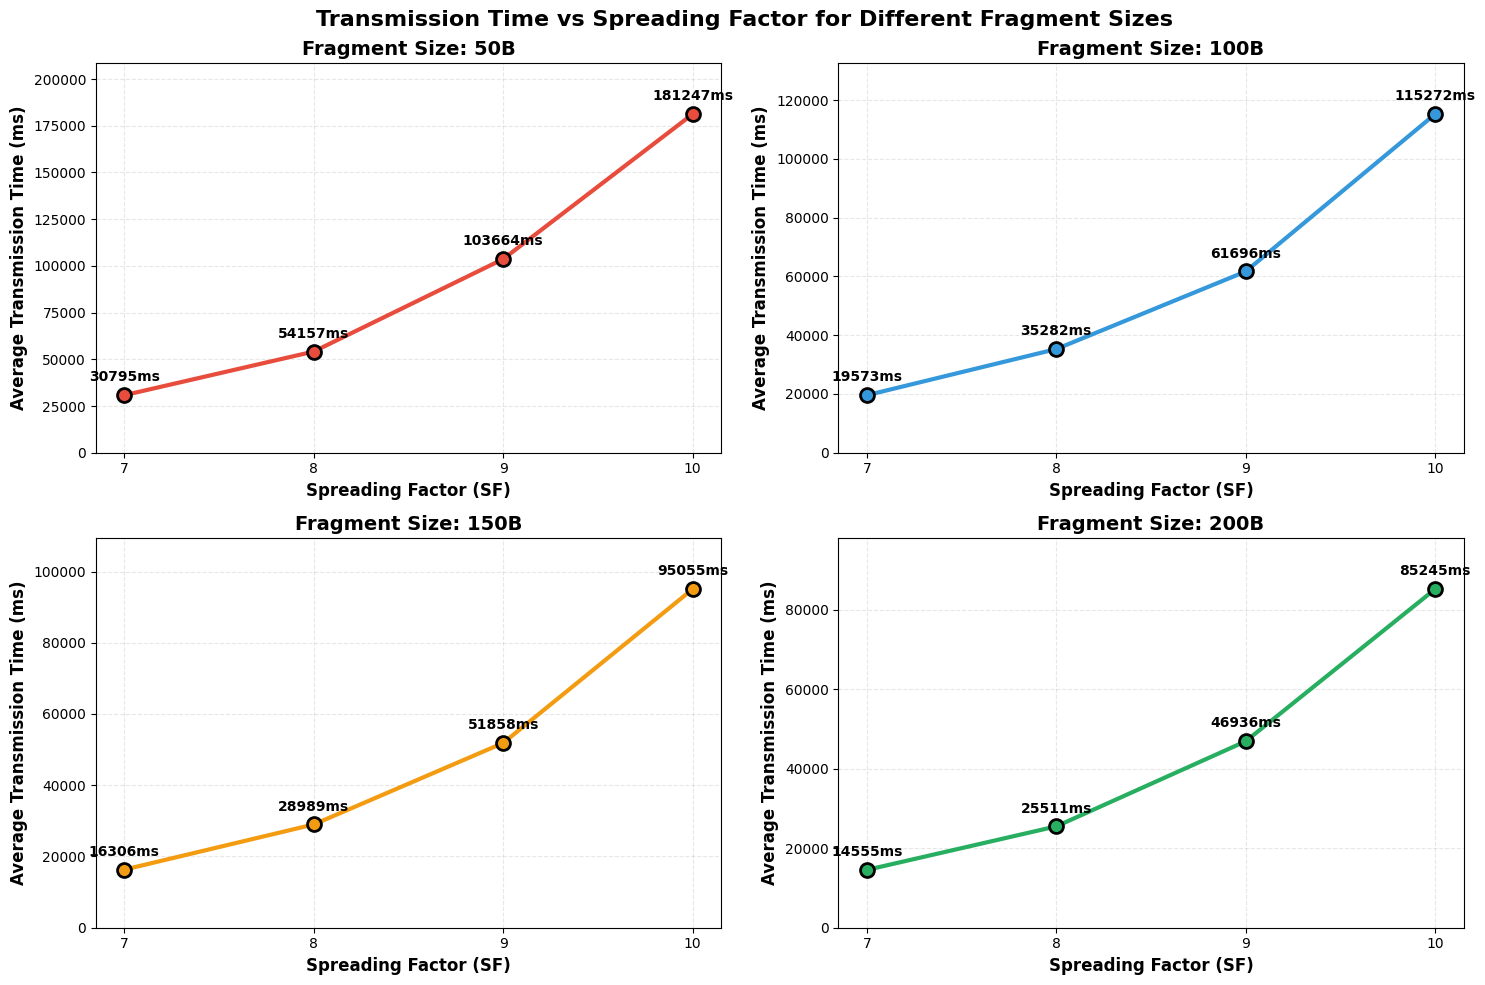

In [19]:
# Get unique fragment sizes
fragment_sizes = sorted(timing_df['Fragment Size (B)'].unique())
colors = ['#E74C3C', '#3498DB', '#F39C12', '#27AE60']

# Create separate transmission time plots for each fragment size
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, frag_size in enumerate(fragment_sizes):
    # Filter data for this fragment size
    frag_data = timing_df[timing_df['Fragment Size (B)'] == frag_size]
    
    # Plot line for this fragment size
    axes[i].plot(frag_data['SF'], frag_data['Avg (ms)'], 
                 marker='o', linewidth=3, markersize=10, 
                 color=colors[i], markeredgecolor='black', markeredgewidth=2)
    
    # Add value labels
    for sf, time_val in zip(frag_data['SF'], frag_data['Avg (ms)']):
        axes[i].annotate(f'{time_val:.0f}ms', (sf, time_val), 
                        textcoords="offset points", xytext=(0,10), 
                        ha='center', fontsize=10, fontweight='bold')
    
    # Formatting for each subplot
    axes[i].set_xlabel('Spreading Factor (SF)', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Average Transmission Time (ms)', fontsize=12, fontweight='bold')
    axes[i].set_title(f'Fragment Size: {frag_size}B', fontsize=14, fontweight='bold')
    axes[i].grid(True, alpha=0.3, linestyle='--')
    axes[i].set_xticks(sorted(timing_df['SF'].unique()))
    
    # Set y-axis to start from 0 for better visualization
    axes[i].set_ylim(0, max(frag_data['Avg (ms)']) * 1.15)

plt.suptitle('Transmission Time vs Spreading Factor for Different Fragment Sizes', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

## PDR vs Spreading Factor for Each Fragment Size

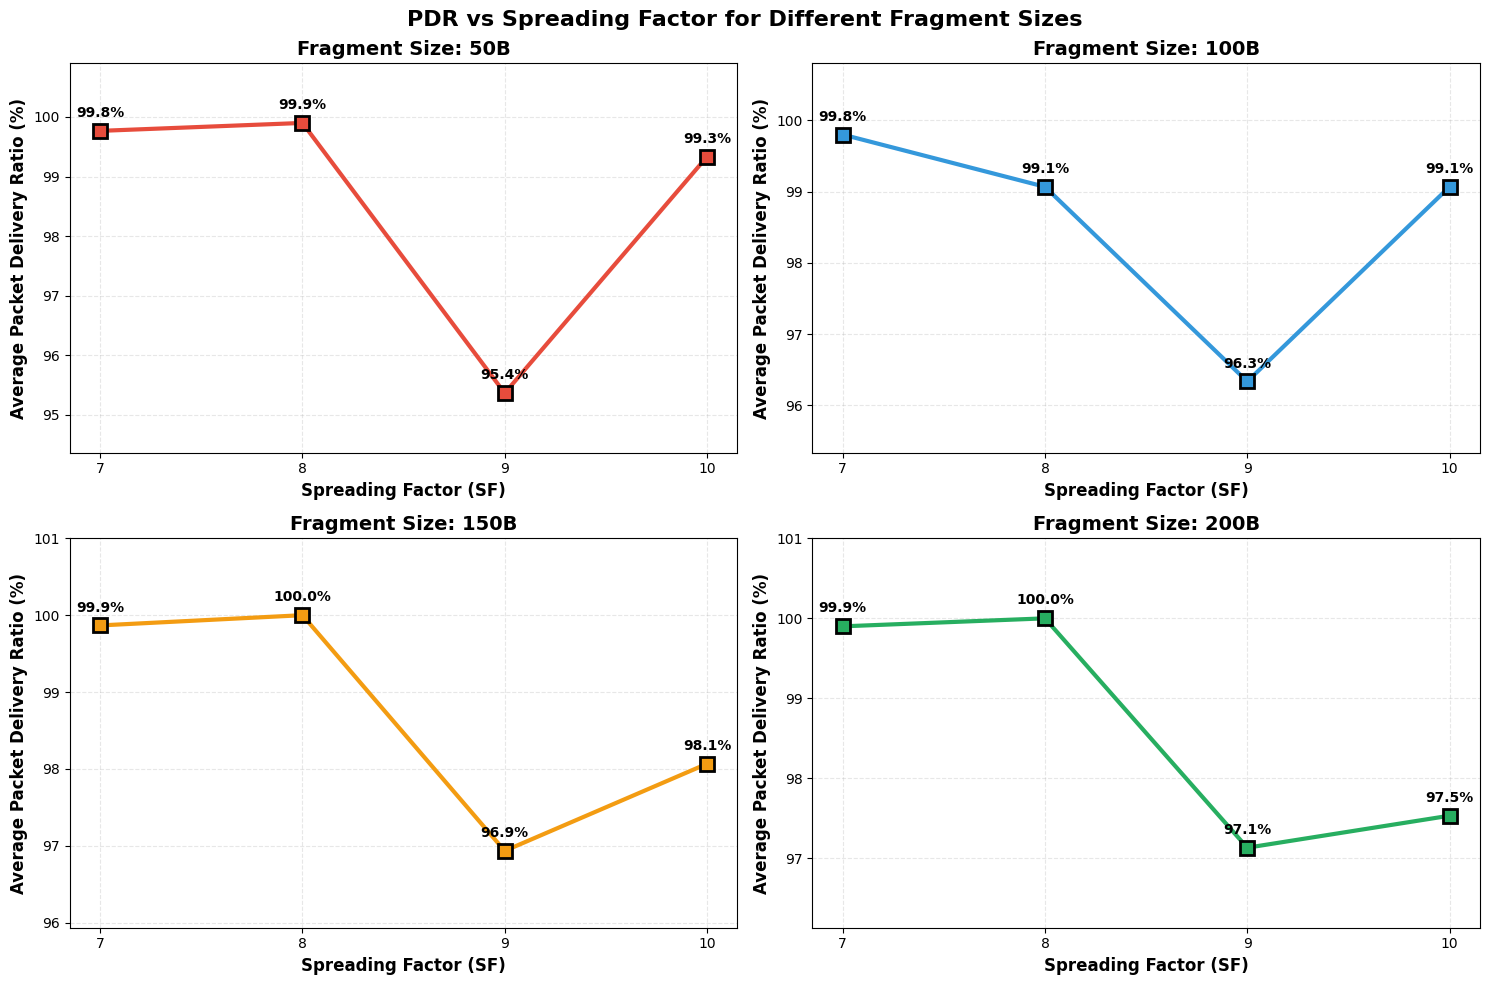

In [20]:
# Create separate PDR plots for each fragment size
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, frag_size in enumerate(fragment_sizes):
    # Filter data for this fragment size
    frag_data = pdr_df[pdr_df['Fragment Size (B)'] == frag_size]
    
    # Plot line for this fragment size
    axes[i].plot(frag_data['SF'], frag_data['Avg (%)'], 
                 marker='s', linewidth=3, markersize=10, 
                 color=colors[i], markeredgecolor='black', markeredgewidth=2)
    
    # Add value labels
    for sf, pdr_val in zip(frag_data['SF'], frag_data['Avg (%)']):
        axes[i].annotate(f'{pdr_val:.1f}%', (sf, pdr_val), 
                        textcoords="offset points", xytext=(0,10), 
                        ha='center', fontsize=10, fontweight='bold')
    
    # Formatting for each subplot
    axes[i].set_xlabel('Spreading Factor (SF)', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Average Packet Delivery Ratio (%)', fontsize=12, fontweight='bold')
    axes[i].set_title(f'Fragment Size: {frag_size}B', fontsize=14, fontweight='bold')
    axes[i].grid(True, alpha=0.3, linestyle='--')
    axes[i].set_xticks(sorted(pdr_df['SF'].unique()))
    
    # Set appropriate y-axis limits for PDR (focus on the variation)
    min_pdr = max(min(frag_data['Avg (%)']), 90)
    max_pdr = min(max(frag_data['Avg (%)']), 101)
    axes[i].set_ylim(min_pdr - 1, max_pdr + 1)

plt.suptitle('PDR vs Spreading Factor for Different Fragment Sizes', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()